# Imports des librairies et transformation des fichiers csv en dataframes

In [122]:
import matplotlib.pyplot as plt
import pandas as pd  
import numpy as np

In [123]:
logs_err = pd.read_csv('../Data/241016_LogETLError.csv', sep=';', dtype={'Program_Id': str, 'Schedules_Id': str, 'Schedules_Name': str})
logs = pd.read_csv('../Data/241016_LogETL.csv',sep=';')

# Visualisation des logs avec ERREUR

### Une première vue avec un scatter graph, pas la visualisation la plus adaptée

J'ajoute des filtres pour abaisser l'échelle des ordonnées. En effet, le 2020/08/29 il y a eu 197k erreurs. Le 2024/10/03 il y en a 4k. 

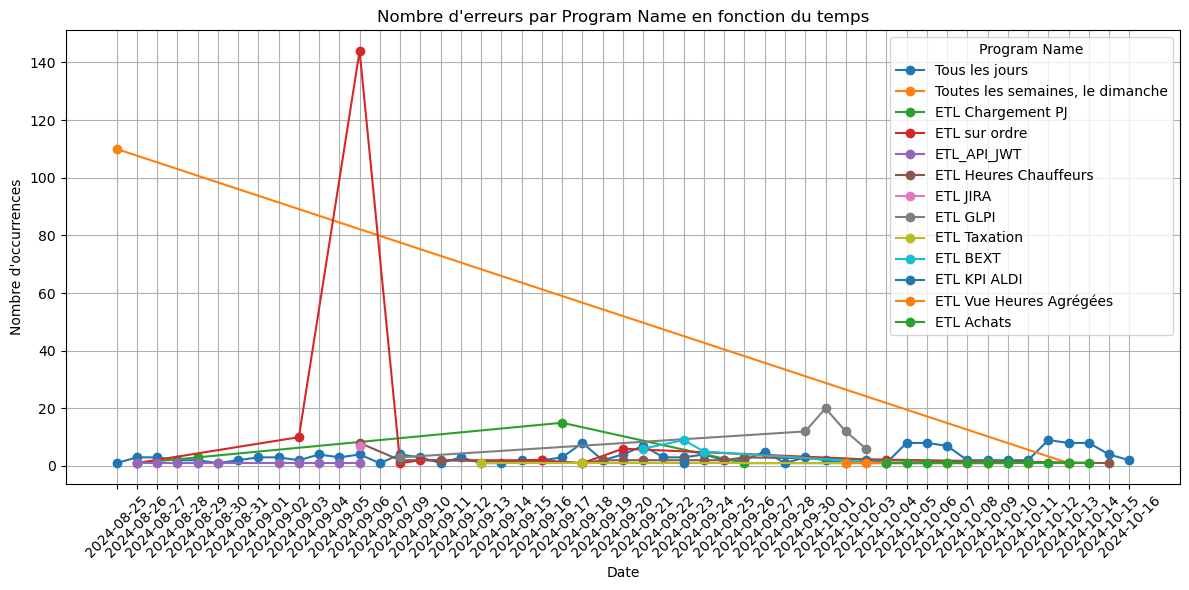

In [124]:
# Filtrer pour enlever le point du 2024-08-29 et 2024-10-03 pour Program_Name "ETL sur ordre"
logs_err = logs_err[~((logs_err['Date'] == '2024-08-29') & (logs_err['Program_Name'] == 'ETL sur ordre'))]
logs_err = logs_err[~((logs_err['Date'] == '2024-10-03') & (logs_err['Program_Name'] == 'ETL sur ordre'))]

# Compter le nombre d'occurrences de chaque Program_Name par date
counts = logs_err.groupby(['Date', 'Program_Name'])['Date'].count().reset_index(name='Count')

# Merger avec dfDate


# Tracer le nombre de Program_Name en fonction du temps
plt.figure(figsize=(12, 6))
for program_name in counts['Program_Name'].unique():
    subset = counts[counts['Program_Name'] == program_name]
    plt.plot(subset['Date'], subset['Count'], marker='o', label=program_name)

plt.title("Nombre d'erreurs par Program Name en fonction du temps")
plt.xlabel("Date")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)  # Pour que les dates soient lisibles
plt.legend(title='Program Name')
plt.grid(True)
plt.tight_layout()  # Ajuste les marges
plt.show()

### Une deuxième vue avec un bar graph, plus appropriée

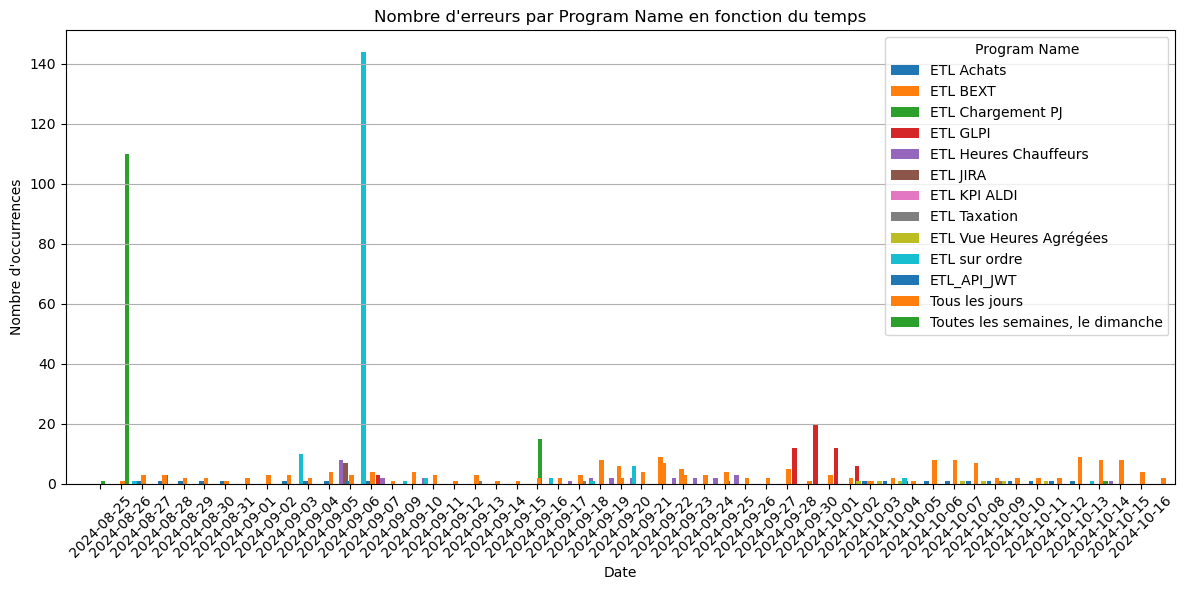

In [125]:
# Filtrer pour enlever le point du 2024-08-29 et 2024-10-03 pour Program_Name "ETL sur ordre"
logs_err = logs_err[~((logs_err['Date'] == '2024-08-29') & (logs_err['Program_Name'] == 'ETL sur ordre'))]
logs_err = logs_err[~((logs_err['Date'] == '2024-10-03') & (logs_err['Program_Name'] == 'ETL sur ordre'))]

# Compter le nombre d'occurrences de chaque Program_Name par date
counts = logs_err.groupby(['Date', 'Program_Name'])['Date'].count().reset_index(name='Count')

# Créer un tableau pivot pour faciliter le traçage
pivot_counts = counts.pivot(index='Date', columns='Program_Name', values='Count').fillna(0)

# Tracer le nombre d'erreurs par Program_Name en fonction du temps avec des barres
plt.figure(figsize=(12, 6))
pivot_counts.plot(kind='bar', width=2.8, ax=plt.gca())

# Réglages des axes
plt.title("Nombre d'erreurs par Program Name en fonction du temps")
plt.xlabel("Date")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)  # Pour que les dates soient lisibles
plt.legend(title='Program Name')
plt.grid(axis='y')
plt.tight_layout()  # Ajuste les marges
plt.show()

Remaque : Il manque les dates pour lesquelles il n'y a pas eu d'erreur. Il faudrait merge avec un vecteur de toutes les dates possibles... 

### Dans le détail, il y a seulement 610 logs erreurs si on ignore le 29/08/2024 et le 03/01/2024

In [126]:
# pour avoir le détail du nombre de lignes dans les logs erreur qui ne concernent pas le 29/08/2024 ou le 
print (len(logs_err['Date']))
logs_err['Date'].value_counts()

610


Date
2024-09-06    164
2024-08-25    111
2024-10-01     22
2024-09-17     18
2024-09-30     15
2024-09-23     15
2024-09-21     15
2024-10-02     14
2024-09-03     13
2024-09-20     12
2024-09-24     11
2024-10-13     11
2024-09-18     11
2024-09-09     10
2024-10-12     10
2024-10-14      9
2024-10-03      9
2024-10-05      9
2024-10-07      9
2024-10-06      9
2024-08-26      6
2024-09-26      6
2024-10-04      6
2024-08-29      6
2024-09-04      5
2024-09-27      5
2024-10-09      5
2024-09-10      5
2024-10-15      5
2024-10-10      4
2024-10-11      4
2024-08-27      4
2024-10-08      4
2024-09-25      4
2024-09-16      4
2024-09-05      4
2024-09-02      4
2024-09-19      4
2024-09-22      3
2024-09-11      3
2024-09-01      3
2024-08-28      3
2024-09-12      3
2024-09-13      2
2024-10-16      2
2024-09-15      2
2024-08-31      2
2024-08-30      2
2024-09-14      1
2024-09-07      1
2024-09-28      1
Name: count, dtype: int64

### On regarde le détail pour un ETL

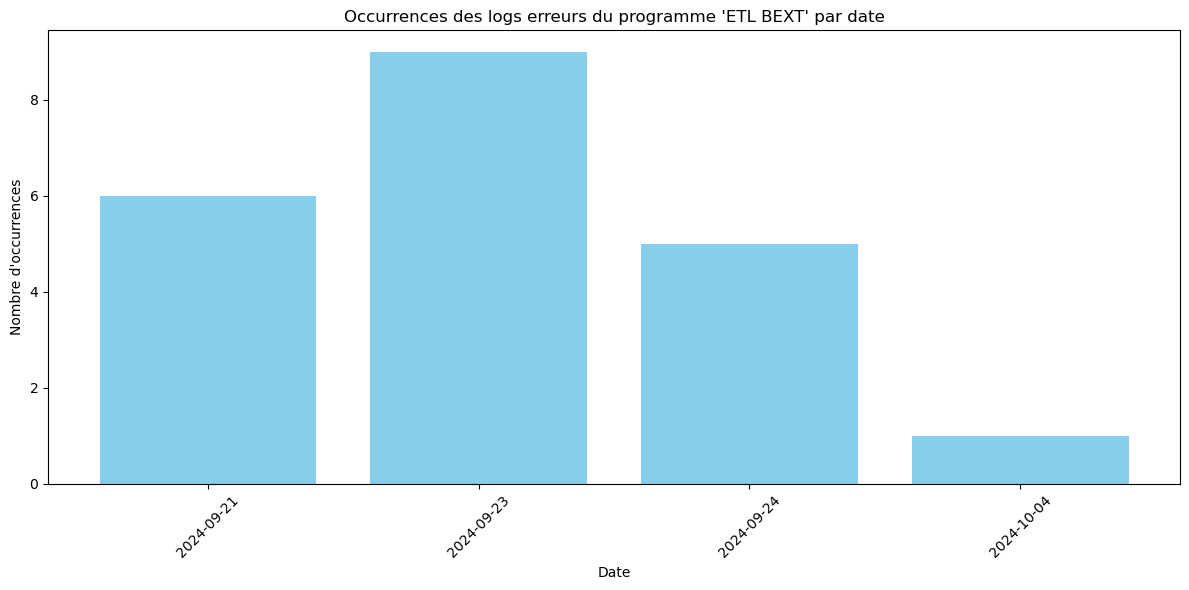

In [129]:
#Filtrer sur un ETL
count_ETL=counts[(counts['Program_Name']=='ETL BEXT')]

# Tracer un bar graph
plt.figure(figsize=(12, 6))
plt.bar(count_ETL['Date'], count_ETL['Count'], color='skyblue')

# Ajouter des labels et un titre
plt.title("Occurrences des logs erreurs du programme 'ETL BEXT' par date")
plt.xlabel("Date")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)  # Pour rendre les dates lisibles

plt.tight_layout()  # Ajuste les marges pour une meilleure lisibilité
plt.show()

# Visualisation des logs

### Une première vue avec un scatter graph, pas la visualisation la plus adaptée

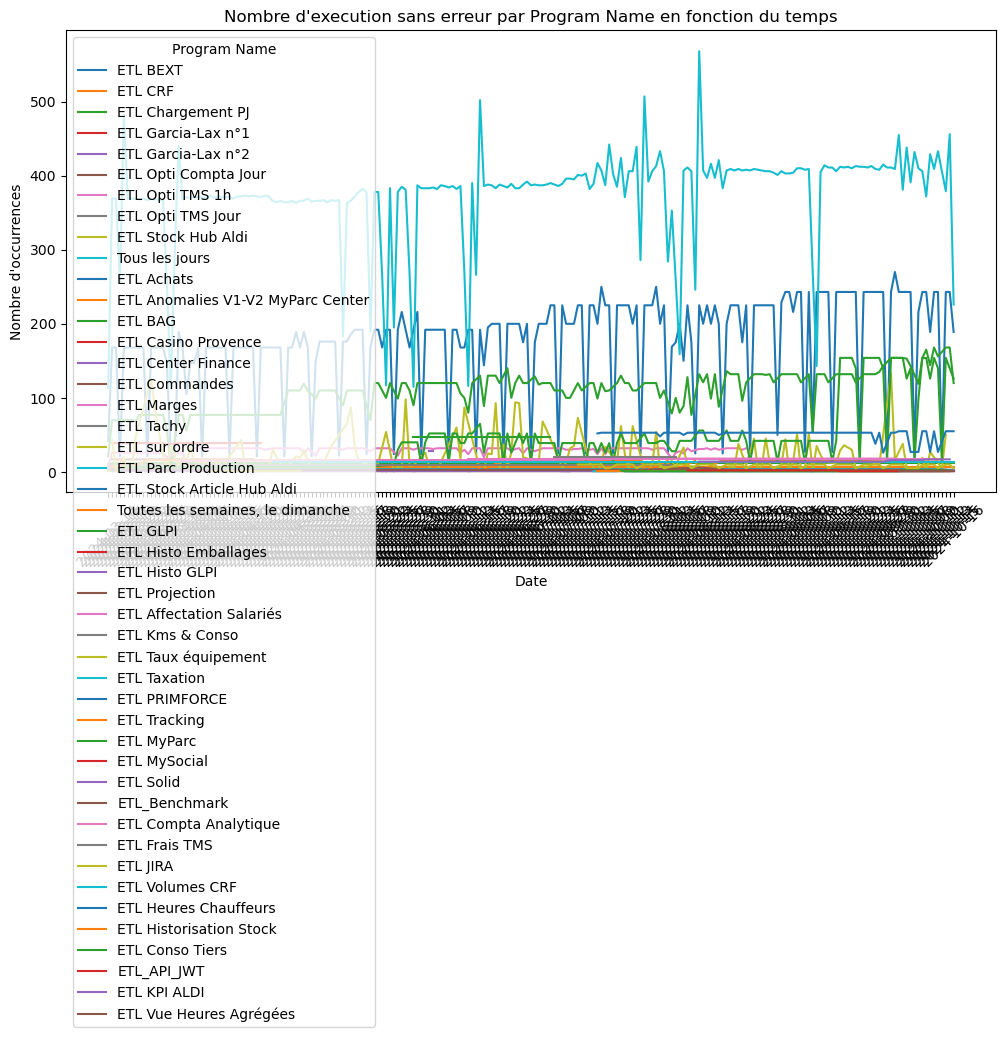

In [102]:
import matplotlib.pyplot as plt

# Enlève les lignes où Date est NaN
logs = logs.dropna(subset=['Date']) 

# Compter le nombre d'occurrences de chaque Program_Name par date
counts = logs.groupby(['Date', 'Program_Name'])['Date'].count().reset_index(name='Count')

# Tracer le nombre de Program_Name en fonction du temps
plt.figure(figsize=(12, 6))
for program_name in counts['Program_Name'].unique():
    subset = counts[counts['Program_Name'] == program_name]
    plt.plot(subset['Date'], subset['Count'], marker='', label=program_name)

plt.title("Nombre d'execution sans erreur par Program Name en fonction du temps")
plt.xlabel("Date")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)  # Pour que les dates soient lisibles
plt.legend(title='Program Name')
plt.grid(False)
#plt.tight_layout()  # Ajuste les marges
plt.show()

### On regarde le détail pour un ETL

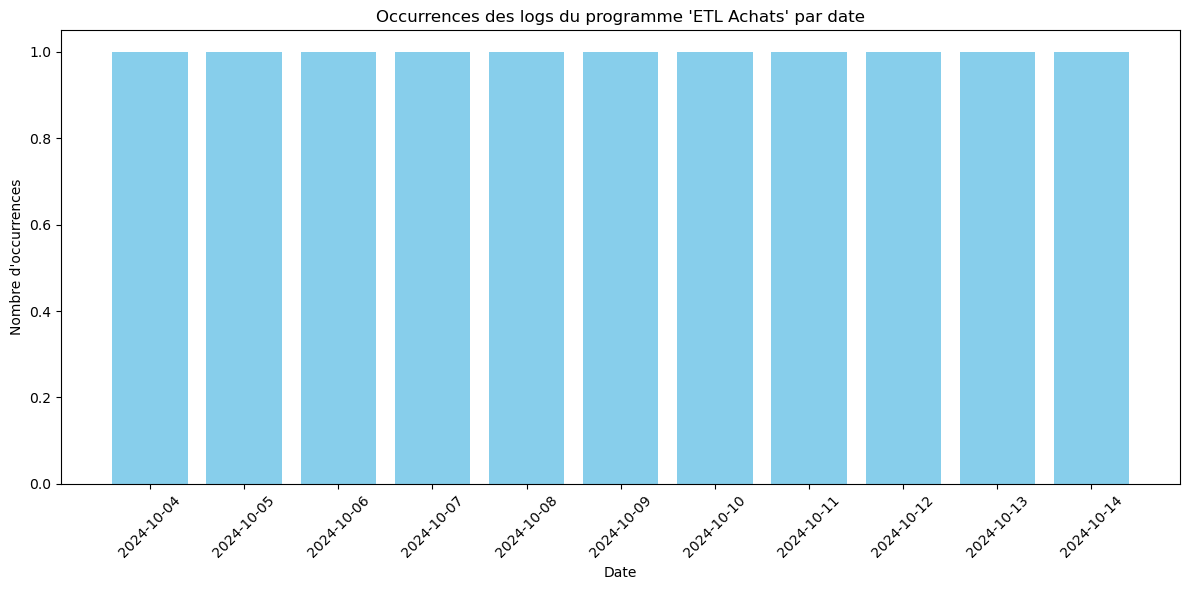

In [130]:
#Filtrer sur ETL
count_ETL=counts[(counts['Program_Name']=='ETL Achats')]

# Tracer un bar graph
plt.figure(figsize=(12, 6))
plt.bar(count_ETL['Date'], count_ETL['Count'], color='skyblue')

# Ajouter des labels et un titre
plt.title("Occurrences des logs du programme 'ETL Achats' par date")
plt.xlabel("Date")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)  # Pour rendre les dates lisibles

plt.tight_layout()  # Ajuste les marges pour une meilleure lisibilité
plt.show()

# Problème : on voit rien si on regarde tous les ETL ensemble. => On va les catégoriser par fréquence d'utilisation

Pour catégoriser, on va classer les Program_Name selon la moyenne quotidienne de leur count => ça revient à calculer la moyenne du nb d'execution quotidienne de chaque Program_Name

Pour calculer cette moyenne, il faut refaire une table count qui prend 0 quand il n'y a pas de log pour un jour donné. On va donc faire un merge avec dfDateprog, une table qui prend toutes les combianisons de Date et Program Name possibles. 

In [115]:
# Extraire les dates et les program names et les mettre dans des vecteurs (dans des df)
dfDate=pd.DataFrame({'Date':logs['Date'].unique()})
dfProgramName=pd.DataFrame({'Program_Name':logs['Program_Name'].unique()})

# Créer toutes les combinaisons possibles de Date et Program_Name => produit cartésien
dfDateProg = dfDate.merge(dfProgramName, how='cross')
print(dfDateProg)

            Date             Program_Name
0     2024-03-14          ETL Opti TMS 1h
1     2024-03-14        ETL Opti TMS Jour
2     2024-03-14        ETL Chargement PJ
3     2024-03-14     ETL Opti Compta Jour
4     2024-03-14                 ETL BEXT
...          ...                      ...
9977  2024-10-16  ETL Historisation Stock
9978  2024-10-16          ETL Conso Tiers
9979  2024-10-16              ETL_API_JWT
9980  2024-10-16             ETL KPI ALDI
9981  2024-10-16  ETL Vue Heures Agrégées

[9982 rows x 2 columns]


In [116]:
print(counts.sort_values(by='Count', ascending=False))

            Date        Program_Name  Count
2322  2024-08-12      Tous les jours    568
2094  2024-07-29      Tous les jours    507
1462  2024-06-17      Tous les jours    502
79    2024-03-18      Tous les jours    482
3520  2024-10-15      Tous les jours    456
...          ...                 ...    ...
2654  2024-08-30     ETL Conso Tiers      1
936   2024-05-10          ETL Marges      1
2651  2024-08-30             ETL CRF      1
938   2024-05-10  ETL Stock Hub Aldi      1
1759  2024-07-09             ETL CRF      1

[3536 rows x 3 columns]


In [117]:
# Fusion de count et dfDateProg
adjustedCount=dfDateProg.merge(counts, on=['Date','Program_Name'], how='left')

#remplacer les valeurs NaN par 0
adjustedCount = adjustedCount.fillna(0)

print(adjustedCount)

            Date             Program_Name  Count
0     2024-03-14          ETL Opti TMS 1h    7.0
1     2024-03-14        ETL Opti TMS Jour    5.0
2     2024-03-14        ETL Chargement PJ   21.0
3     2024-03-14     ETL Opti Compta Jour    2.0
4     2024-03-14                 ETL BEXT   42.0
...          ...                      ...    ...
9977  2024-10-16  ETL Historisation Stock    0.0
9978  2024-10-16          ETL Conso Tiers    0.0
9979  2024-10-16              ETL_API_JWT    1.0
9980  2024-10-16             ETL KPI ALDI    0.0
9981  2024-10-16  ETL Vue Heures Agrégées    1.0

[9982 rows x 3 columns]


In [119]:
# Calculer la moyenne des Count par Program_Name
mean_counts = adjustedCount.groupby('Program_Name')['Count'].mean().reset_index(name='Mean_Count')
max_counts = adjustedCount.groupby('Program_Name')['Count'].max().reset_index(name='Max_Count')
min_counts = adjustedCount.groupby('Program_Name')['Count'].min().reset_index(name='Min_Count')
sum_counts = adjustedCount.groupby('Program_Name')['Count'].sum().reset_index(name='Sum_Count')

# Fusionner les DataFrames sur 'Program_Name'
stats_counts = mean_counts.merge(max_counts, on='Program_Name').merge(min_counts, on='Program_Name').merge(sum_counts, on='Program_Name')

# Trier par Mean_Count en ordre décroissant
stats_counts = stats_counts.sort_values(by='Mean_Count', ascending=False)

# Afficher le DataFrame mis à jour
print(stats_counts)

                         Program_Name  Mean_Count  Max_Count  Min_Count  \
44                     Tous les jours  374.373272      568.0      113.0   
4                            ETL BEXT  173.451613      270.0       21.0   
8                   ETL Chargement PJ   94.239631      168.0        0.0   
13                           ETL GLPI   37.686636      154.0        0.0   
27                    ETL Opti TMS 1h   19.276498       32.0        0.0   
16              ETL Heures Chauffeurs   17.917051       55.0        0.0   
41                      ETL sur ordre   15.470046      133.0        0.0   
3                             ETL BAG    8.018433       12.0        0.0   
37                       ETL Taxation    7.354839       14.0        0.0   
2   ETL Anomalies V1-V2 MyParc Center    6.483871        7.0        0.0   
6                 ETL Casino Provence    5.741935       39.0        0.0   
21                       ETL KPI ALDI    3.705069       17.0        0.0   
14                 ETL Ga

On peut catégoriser par la moyenne. 